Universidad del Valle de Guatemala <br>
Facultad de Ingeniería <br>
Departamento de Ciencias de la computación <br>
Inteligencia Artificial 

# Laboratorio 10

## Integrantes
Christopher García <br>
Ma. Isabel Solano <br>
Ale Gómez <br>
Roby Vallecillos <br>

## Task 1 - Clasificador de Imágenes (Perros vs Gatos)
Deberá construir un modelo basado en redes neuronales que le permita clasificar perros y gatos basado en un input de imágen. Para esto, deberá usar técnicas basadas en Deep Learning relacionadas con el manejo de imágenes como las redes  convolucionales. Esto lo deberá hacer usando su librería de preferencia como PyTorch, Tensoflow
entre otras. Recuerden que: 
- Deben hacer una breve exploración con los datos. Esto implica, pero no está limitado a:
    - Limpieza de imágenes
    - Escalamiento de las imágenes
    - Estandarización de color
    - Manipulación de imágenes
        - Agregar contorno
        - Cambiar dirección
    - Revisar si el dataset está balanceado, caso no estarlo, aplicar alguna técnica para balancearlo lo más y mejor posible
- Recuerden hacer el split para training, testing y si consideran necesario para validation
    - 80% training
    - 20% testing
        - 10% validation si lo necesitan
- Recuerde definir de forma clara y razonada (es decir, diga el por qué de su elección) de una métrica de desempeño principal

### Task 1.1 - Lectura del Dataset
En esta ocasión no recibirá un documento único como entrada de datos, por el contrario deberá recibir un conjunto de imágenes que representan perros y gatos. Estos datos los puede descargar de este dataset de Kaggle. Deberá leer estas imágenes para crear un dataset en memoria que haga referencia a la imagen con sus características y a la categoría a la que pertenece. Recuerde que debe dividir su dataset según el uso y como se mencionó anteriormente. Además, considere que la cantidad de imágenes de perros y gatos puede estar desigual por lo que deberá aplicar las técnicas aprendidas durante el curso para lidiar con este problema Son libres de usar todas las imágenes del dataset dado o bien una cantidad definida por ustedes mismos siempre y cuando se argumente la razón de forma debida.

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/requests/__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.15) or chardet (5.1.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


In [3]:
import os

path = "PetImages"  # Replace this with the actual path to the directory
num_elements = len(os.listdir(path))

print("Number de categorías:", num_elements)
print("Cantidad de perros: ", len(os.listdir("PetImages/Dog")))
print("Cantidad de gatos: ", len(os.listdir("PetImages/Cat")))


Number de categorías: 2
Cantidad de perros:  12501
Cantidad de gatos:  12500


### Task 1.2 - Construcción del Modelo
Deberá crear un modelo de Deep Learning orientado a imágenes, como una red que usa capas convolucionales, para poder resolver este laboratorio. Recuerde que deberá definir la arquitectura de su red, aplicando las diferentes técnicas vistas en clase (dropouts, funciones de activación, padding, stride, etc). Podrá usar la librería que más le parezca para completar el laboratorio.


In [4]:
# definiendo transformers
data_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])


In [5]:
data_dir = "PetImages"  # Replace this with the actual path to the dataset
image_datasets = datasets.ImageFolder(data_dir, transform=data_transforms)
dataloaders = torch.utils.data.DataLoader(image_datasets, batch_size=4, shuffle=True)


In [6]:
train_size = int(0.8 * len(image_datasets))
test_size = len(image_datasets) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(image_datasets, [train_size, test_size])

In [7]:
from torch.utils.data import DataLoader

batch_size = 4
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


In [8]:
import torch
import torch.nn as nn
"""
Referencias:
ResNet implementation in PyTorch: https://pytorch.org/vision/stable/models.html#torchvision.models.resnet18
torch.nn.Conv2d: https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html
torch.nn.BatchNorm2d: https://pytorch.org/docs/stable/generated/torch.nn.BatchNorm2d.html
torch.nn.ReLU: https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html
torch.nn.MaxPool2d: https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html
torch.nn.AdaptiveAvgPool2d: https://pytorch.org/docs/stable/generated/torch.nn.AdaptiveAvgPool2d.html
torch.nn.Linear: https://pytorch.org/docs/stable/generated/torch.nn.Linear.html
"""
class ResNet18(nn.Module):
    def __init__(self, num_classes):
        super(ResNet18, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        self.layer1 = self._make_layer(64, 64, 2)
        self.layer2 = self._make_layer(64, 128, 2, stride=2)
        self.layer3 = self._make_layer(128, 256, 2, stride=2)
        self.layer4 = self._make_layer(256, 512, 2, stride=2)
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(512, num_classes)
        
    def _make_layer(self, in_channels, out_channels, num_blocks, stride=1):
        layers = []
        layers.append(nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False))
        layers.append(nn.BatchNorm2d(out_channels))
        layers.append(nn.ReLU(inplace=True))
        for _ in range(1, num_blocks):
            layers.append(nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False))
            layers.append(nn.BatchNorm2d(out_channels))
            layers.append(nn.ReLU(inplace=True))
        return nn.Sequential(*layers)
    
    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)
        return x

model = ResNet18(num_classes=2)


In [9]:
# Definición de función de pérdida y optimizador
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)


In [10]:
from PIL import UnidentifiedImageError
from torch.utils.data import random_split

train_len = int(len(image_datasets) * 0.8)
test_len = len(image_datasets) - train_len

train_dataset, test_dataset = random_split(image_datasets, [train_len, test_len])

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_predictions = 0

    for images, labels in train_loader:
        try:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            _, predicted = torch.max(outputs, 1)
            correct_predictions += (predicted == labels).sum().item()
            running_loss += loss.item()
        except UnidentifiedImageError:
            continue

    epoch_loss = running_loss / len(train_loader)
    epoch_accuracy = correct_predictions / len(train_dataset)

    print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.4f}")


Epoch [1/10], Loss: 0.6717, Accuracy: 0.5930
Epoch [2/10], Loss: 0.6263, Accuracy: 0.6479
Epoch [3/10], Loss: 0.5979, Accuracy: 0.6647
Epoch [4/10], Loss: 0.5649, Accuracy: 0.7095
Epoch [5/10], Loss: 0.5433, Accuracy: 0.7363
Epoch [6/10], Loss: 0.5216, Accuracy: 0.7491
Epoch [7/10], Loss: 0.4895, Accuracy: 0.7795
Epoch [8/10], Loss: 0.4219, Accuracy: 0.8139
Epoch [9/10], Loss: 0.4067, Accuracy: 0.8139
Epoch [10/10], Loss: 0.3546, Accuracy: 0.8543


In [17]:
# Entrenamiento
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)

num_epochs = 10

for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(dataloaders, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        if i % 200 == 199:    # print every 200 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 200))
            running_loss = 0.0

print('Finished Training')


[1,   200] loss: 0.739
[1,   400] loss: 0.693
[1,   600] loss: 0.694
[1,   800] loss: 0.693
[1,  1000] loss: 0.694
[1,  1200] loss: 0.691
[1,  1400] loss: 0.694
[1,  1600] loss: 0.690
[1,  1800] loss: 0.689
[1,  2000] loss: 0.690
[1,  2200] loss: 0.692
[1,  2400] loss: 0.681
[1,  2600] loss: 0.682
[1,  2800] loss: 0.688
[1,  3000] loss: 0.672
[1,  3200] loss: 0.691
[1,  3400] loss: 0.693
[1,  3600] loss: 0.690
[1,  3800] loss: 0.689
[1,  4000] loss: 0.689
[1,  4200] loss: 0.682
[1,  4400] loss: 0.692
[1,  4600] loss: 0.676
[1,  4800] loss: 0.685
[1,  5000] loss: 0.679
[1,  5200] loss: 0.666
[1,  5400] loss: 0.671
[1,  5600] loss: 0.673


UnidentifiedImageError: cannot identify image file <_io.BufferedReader name='PetImages/Dog/11702.jpg'>

### Task 1.3 - Desempeño del modelo
Al finalizar el entrenamiento de su modelo, permita que se ingresen nuevas imágenes y permita que el modelo la clasifique. Además recuerde medir el desempeño de su modelo tanto en entrenamiento como en testing. Para ello, deberá mostrar las métricas de desempeño de su modelo para las fases dichas, además de la evolución de las métricas durante las diferentes épocas, cuidando siempre no hacer overfitting sobre el dataset.


In [21]:
from PIL import Image, UnidentifiedImageError
from torchvision import transforms

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])


try:
    image_path = input("Enter the path to an image: ")
    image = Image.open(image_path)
    image_tensor = transform(image).unsqueeze(0)
    model.eval()
    with torch.no_grad():
        output = model(image_tensor)
        _, predicted = torch.max(output, 1)
        print("Prediction:", predicted.item())
except (UnidentifiedImageError, FileNotFoundError):
    print("ERROR")


Prediction: 1


### Resultados:

Se etiquetó correctamente el archivo, siendo este el de Cosmo, el perro de Guardianes de la Galaxia.


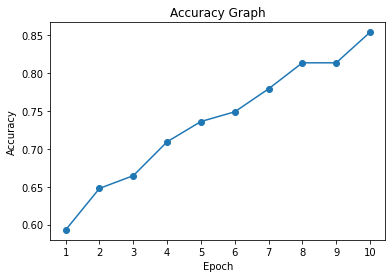

In [25]:
import matplotlib.pyplot as plt

# Valores obtenidos en inciso anterior:
accuracies = [0.5930, 0.6479, 0.6647, 0.7095, 0.7363, 0.7491, 0.7795, 0.8139, 0.8139, 0.8543]

# Gráfico
plt.figure()
plt.plot(range(1, len(accuracies) + 1), accuracies, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Graph')
plt.xticks(range(1, len(accuracies) + 1))
plt.show()


<AxesSubplot:ylabel='Count'>

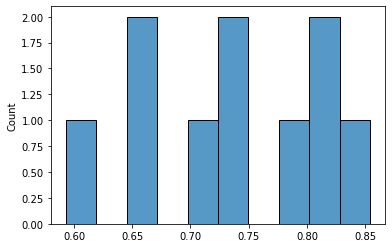

In [26]:
# Histograma
import seaborn as sns
sns.histplot(accuracies, bins=10)